In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
customer_data = pd.read_csv('/content/drive/MyDrive/DATA/new_data_1.csv')
customer_data.head()

,Column1,dong,bus_stop_num,bus_all,old_all,taxi_all,ratio
0,0,동구 원동,7,978191,1904,19011,272.000000
1,1,동구 인동,9,200096,493,30751,54.777778
2,2,동구 효동,7,98540,54,12861,7.714286
3,3,동구 천동,10,71832,35,22742,3.500000
4,4,동구 가오동,25,349997,250,68585,10.000000


In [52]:
data = customer_data.iloc[:,2:7].values

data1 = customer_data.iloc[:,2:7]
data1

data2 = customer_data.iloc[:,2:7]

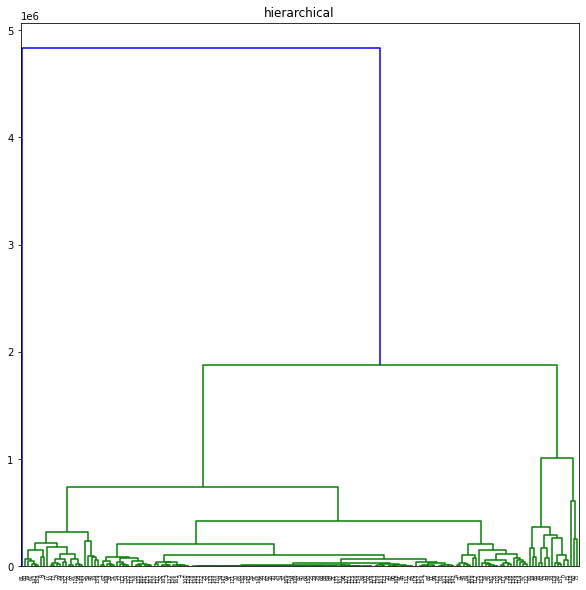

In [53]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("hierarchical")
# Valid options are dict_keys(['ward', 'complete', 'average', 'single'])
dend = shc.dendrogram(shc.linkage(data, method='complete'))

In [54]:
from sklearn.cluster import AgglomerativeClustering

# Valid options are dict_keys(['ward', 'complete', 'average', 'single'])
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')
# cluster.fit_predict(data)

In [55]:
clu = cluster.fit_predict(data)
clu_2= pd.Series(clu)
pd.concat([customer_data,clu_2],axis=1)

,Column1,dong,bus_stop_num,bus_all,old_all,taxi_all,ratio,0
0,0,동구 원동,7,978191,1904,19011,272.000000,1
1,1,동구 인동,9,200096,493,30751,54.777778,6
2,2,동구 효동,7,98540,54,12861,7.714286,6
3,3,동구 천동,10,71832,35,22742,3.500000,6
4,4,동구 가오동,25,349997,250,68585,10.000000,4
...,...,...,...,...,...,...,...,...
172,172,대덕구 부수동,0,0,0,0,0.000000,6
173,173,대덕구 황호동,0,0,0,0,0.000000,6
174,174,대덕구 삼정동,8,1510,1,162,0.125000,6
175,175,대덕구 미호동,11,4522,1,270,0.090909,6


In [56]:
customer_data['cluster_id']= pd.Series(clu)

In [57]:
customer_data.groupby('cluster_id').median()

,Column1,bus_stop_num,bus_all,old_all,taxi_all,ratio
cluster_id,,,,,,
0,73.0,19.5,526620.5,329.0,80768.5,16.458647
1,47.0,24.0,962003.0,1325.5,116803.5,159.285714
2,66.5,43.0,1415072.5,1457.0,153852.0,33.883721
3,80.0,28.0,1132062.0,1233.0,232871.0,23.411765
4,109.0,15.0,304412.0,155.0,61614.0,10.000000
5,108.0,34.0,1839947.0,121575.0,363650.0,3575.735294
6,99.0,8.0,7635.0,8.0,429.0,0.857143
7,81.0,72.0,4767342.0,138476.0,766681.0,1923.277778


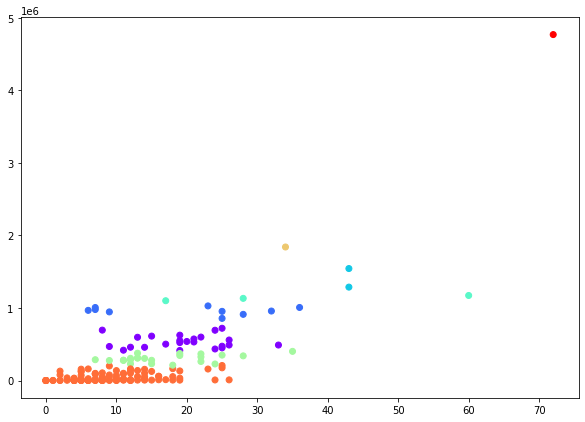

In [58]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0],data[:,1], c=cluster.labels_, cmap='rainbow')

In [59]:
df0 = pd.DataFrame(data1[cluster.fit_predict(data) == 0])
df0

,bus_stop_num,bus_all,old_all,taxi_all,ratio
6,20,538031,138873,67136,6943.650000
8,33,488806,626,94038,18.969697
9,13,595970,76728,62973,5902.153846
10,9,468852,119,83621,13.222222
17,25,472570,279,71547,11.160000
19,8,694306,1189,95292,148.625000
46,24,692645,70224,145046,2926.000000
57,15,611832,205895,152721,13726.333330
58,26,489007,708,133255,27.230769
59,19,624933,1008,149269,53.052632


In [60]:
pd.DataFrame(data1[cluster.fit_predict(data) == 1])

,bus_stop_num,bus_all,old_all,taxi_all,ratio
0,7,978191,1904,19011,272.000000
13,25,855992,747,178690,29.880000
15,9,945335,253,62534,28.111111
18,6,966683,243650,118027,40608.333330
45,7,1006022,326,96756,46.571429
49,28,911680,42712,206400,1525.428571
76,25,953013,66764,298355,2670.560000
82,32,957323,82941,268956,2591.906250
119,23,1027987,392,98777,17.043478
151,36,1006608,367,115580,10.194444


In [61]:
pd.DataFrame(data1[cluster.fit_predict(data) == 2])

,bus_stop_num,bus_all,old_all,taxi_all,ratio
60,43,1287135,1097,142957,25.511628
73,43,1543010,1817,164747,42.255814


In [62]:
pd.DataFrame(data1[cluster.fit_predict(data) == 3])

,bus_stop_num,bus_all,old_all,taxi_all,ratio
14,17,1099550,398,232871,23.411765
80,28,1132062,70521,341468,2518.607143
85,60,1171835,1233,188888,20.550000


In [63]:
pd.DataFrame(data1[cluster.fit_predict(data) == 4])

,bus_stop_num,bus_all,old_all,taxi_all,ratio
4,25,349997,250,68585,10.000000
16,13,308466,64,75670,4.923077
35,11,277134,155,23230,14.090909
47,12,229839,143,62679,11.916667
48,13,376196,105,84122,8.076923
55,7,286655,166,18106,23.714286
56,12,285182,145,33763,12.083333
71,19,344610,76,73220,4.000000
75,9,275685,124120,106389,13791.111110
78,12,305614,234,47754,19.500000


In [64]:
pd.DataFrame(data1[cluster.fit_predict(data) == 5])

,bus_stop_num,bus_all,old_all,taxi_all,ratio
108,34,1839947,121575,363650,3575.735294


In [65]:
pd.DataFrame(data1[cluster.fit_predict(data) == 6])

,bus_stop_num,bus_all,old_all,taxi_all,ratio
1,9,200096,493,30751,54.777778
2,7,98540,54,12861,7.714286
3,10,71832,35,22742,3.500000
5,7,91632,62,16111,8.857143
7,10,34256,196,871,19.600000
...,...,...,...,...,...
171,4,415,0,15,0.000000
172,0,0,0,0,0.000000
173,0,0,0,0,0.000000
174,8,1510,1,162,0.125000


In [66]:
pd.DataFrame(data1[cluster.fit_predict(data) == 7])

,bus_stop_num,bus_all,old_all,taxi_all,ratio
81,72,4767342,138476,766681,1923.277778


In [67]:
# pd.DataFrame(data1[cluster.fit_predict(data) == 8])

In [68]:
# pd.DataFrame(data1[cluster.fit_predict(data) == 9])

In [69]:
x = customer_data[['bus_stop_num','bus_all','old_all','taxi_all','ratio']]
pred = pd.DataFrame(cluster.fit_predict(data))
pred.columns = ['pre']
r = pd.concat([x,pred],axis = 1)
print(r)

     bus_stop_num  bus_all  old_all  taxi_all       ratio  pre
0               7   978191     1904     19011  272.000000    1
1               9   200096      493     30751   54.777778    6
2               7    98540       54     12861    7.714286    6
3              10    71832       35     22742    3.500000    6
4              25   349997      250     68585   10.000000    4
..            ...      ...      ...       ...         ...  ...
172             0        0        0         0    0.000000    6
173             0        0        0         0    0.000000    6
174             8     1510        1       162    0.125000    6
175            11     4522        1       270    0.090909    6
176            24   434406      136     42000    5.666667    0

[177 rows x 6 columns]


In [70]:
# # clu = cluster.fit_predict(data)
# # data['cluster'] = cluster.fit_predict(data)


# clu=pd.Series(cluster.fit_predict(data))
# cluster = pd.Series(clu)
# pd.concat([customer_data,cluster],axis=1)


